## Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import cross_validate, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor

## Data Preprocessing

First, we read in the dataset.

In [2]:
#| label: dataset-preview

# Run these commands if running notebooks on Jupyter, or locally.

df = pd.read_csv("../data/solar.csv")
df.head(5)

,id,lat,long,state,farm_type,irradiance,lcoe,capacity,capacity_factor,array_area,available_solar_resource,generated_energy,cost
0,0,25.896492,-97.460358,Texas,large_community,5.634079,39,5.00,0.235,90633.862770,21.276596,6132.00,4782960.0
1,1,26.032654,-97.738098,Texas,small_utility,5.616413,39,5.00,0.234,91307.484990,21.367521,6132.00,4782960.0
2,2,26.059063,-97.208252,Texas,small_community,5.746738,39,0.15,0.239,2621.097459,0.627615,183.96,143488.8
3,3,26.078449,-98.073364,Texas,small_utility,5.742196,39,5.00,0.239,87439.036330,20.920502,6132.00,4782960.0
4,4,26.143227,-98.311340,Texas,small_utility,5.817187,39,5.00,0.242,85241.850210,20.661157,6132.00,4782960.0


In [3]:
# Run these commands when running the notebooks on Google Colab.

df = pd.read_csv('https://raw.githubusercontent.com/AidanNeeson/renewable-ml/main/data/solar.csv')
df.head(5)

,id,lat,long,state,farm_type,irradiance,lcoe,capacity,capacity_factor,array_area,available_solar_resource,generated_energy,cost
0,0,25.896492,-97.460358,Texas,large_community,5.634079,39,5.00,0.235,90633.862770,21.276596,6132.00,4782960.0
1,1,26.032654,-97.738098,Texas,small_utility,5.616413,39,5.00,0.234,91307.484990,21.367521,6132.00,4782960.0
2,2,26.059063,-97.208252,Texas,small_community,5.746738,39,0.15,0.239,2621.097459,0.627615,183.96,143488.8
3,3,26.078449,-98.073364,Texas,small_utility,5.742196,39,5.00,0.239,87439.036330,20.920502,6132.00,4782960.0
4,4,26.143227,-98.311340,Texas,small_utility,5.817187,39,5.00,0.242,85241.850210,20.661157,6132.00,4782960.0


Now, we must shuffle the datasets to reduce bias.

In [3]:
#| label: shuffled-dataset-preview

df = df.sample(frac=1)
df.head(5)

,id,lat,long,state,farm_type,irradiance,lcoe,capacity,capacity_factor,array_area,available_solar_resource,generated_energy,cost
3768,3768,34.595978,-101.395447,Texas,small_residential,6.161978,39,0.005,0.257,75.775358,0.019455,6.132,4782.96
7020,7020,35.248310,-103.950714,New Mexico,small_residential,6.504286,34,0.005,0.271,68.078870,0.018450,6.132,4169.76
2886,2886,34.296539,-101.171387,Texas,medium_community,6.143694,39,2.000,0.256,30519.098500,7.812500,2452.800,1913184.00
2459,2459,33.977848,-103.510773,New Mexico,small_utility,6.502355,34,5.000,0.271,68099.084300,18.450184,6132.000,4169760.00
116,116,26.532219,-98.917480,Texas,small_residential,5.747884,39,0.005,0.239,87.352498,0.020921,6.132,4782.96


Looking at each dataset, we can identify which variables we want to use for our models.

In [16]:
X = df.loc[:, ['lat','long','capacity']]
y = df.loc[:, ['generated_energy','cost']]

Now we split into training and testing sets, reserving about 80% for training and 20% for testing.

In [17]:
X_train = X[:9500]
X_test = X[9500:]
y_train = y[:9500]
y_test = y[9500:]

Models typically perform better when input values are within a certain range, like [-1, 1] for example. We scale the data points appropriately.

In [6]:
#| label: scaled-data

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-0.13240247, -0.08048336, -0.44220054],
       [ 0.03389717, -0.4094644 , -0.44220054],
       [-0.20873875, -0.05163647, -0.43901059],
       ...,
       [-0.03585628, -0.56732468, -0.44196869],
       [-0.03493828, -0.42838662, -0.44219254],
       [ 1.38778536,  1.4910043 , -0.44219254]])

## Training the Models

Now that the data is pre-processed accordingly, the models can be trained and fit.

In [7]:
reg = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(4,), max_iter=100000000000)
reg.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(4,), max_iter=100000000000, solver='lbfgs')

With a trained model, predictions can now be made.

In [8]:
#| label: prediction-comparisons

display = y_test.reset_index()
preds = reg.predict(X_test)
print("Predictions")
print("----------------------")
for i in range(3):
    print(f"predicted energy: {preds[i][0]:.2f}\tactual energy: {display.at[i, 'generated_energy']:.2f}\tpredicted cost: {preds[i][1]:.2f}\tactual cost: {display.at[i, 'cost']:.2f}")

Predictions
----------------------
predicted energy: 23.33	actual energy: 6132.00	predicted cost: 18878.16	actual cost: 4660320.00
predicted energy: 23.33	actual energy: 18.40	predicted cost: 18878.16	actual cost: 14348.88
predicted energy: 23.33	actual energy: 18.40	predicted cost: 18878.16	actual cost: 14348.88


## Testing and Analyzing the Models

This section contains metrics gathering and other figures that visualize the models and its results.

### Metrics

#### Scores and Error Values

The score being recored are the R2 score, Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE).

In [9]:
#| label: metrics

r2 = metrics.r2_score(y_test, preds, multioutput="raw_values")
rmse = metrics.root_mean_squared_error(y_test, preds, multioutput="raw_values")
mape = metrics.mean_absolute_percentage_error(y_test, preds, multioutput="raw_values")

print("Metric\tScore")
print("-----------------------")
print(f"r2\t{r2}\nrmse\t{rmse}\nmape\t{mape}")

Metric	Score
-----------------------
r2	[0.99902339 0.99667298]
rmse	[2.38406355e+04 3.46787739e+07]
mape	[0.84806197 0.8870492 ]


#### K-Fold Cross Validation

This cross validation splits up the dataset into 10 unique folds, which are then used to test a model. The model is then scored using the same metrics outlined above: R2, RMSE, MAPE. This ensures the scoring is rigorous, and the *entire* dataset is used.

In [12]:
#| label: k-fold-cross-validation-table

kf = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_validate(reg, X, y, cv=kf, scoring={"r2":metrics.make_scorer(score_func=metrics.r2_score),
 "rmse":metrics.make_scorer(score_func=metrics.root_mean_squared_error),
 "mape":metrics.make_scorer(score_func=metrics.mean_absolute_percentage_error)})
kf_cv_df = pd.DataFrame.from_dict(kf_cv_scores)
means = kf_cv_df.mean()
print("10-Fold Cross Validation Scores")
print("----------------------------------------------------")
print(f"R2 Average: {means.iloc[2]}")
print(f"RMSE Average: {means.iloc[3]}")
print(f"MAPE Average: {means.iloc[4]}")
kf_cv_df

10-Fold Cross Validation Scores
----------------------------------------------------
R2 Average: 0.7025267979882951
RMSE Average: 60401706.12189176
MAPE Average: 153.45564241338886


,fit_time,score_time,test_r2,test_rmse,test_mape
0,0.775316,0.015012,0.920262,2.345819e+07,294.079767
1,0.102844,0.004999,0.993852,2.922157e+07,190.852911
2,0.119983,0.005017,0.993431,2.990562e+07,209.905686
3,0.646986,0.004013,-0.466820,3.201413e+07,152.461293
4,0.068974,0.005002,0.993574,3.179233e+07,139.604871
5,0.340269,0.006996,0.995613,2.879659e+07,0.784094
6,1.826744,0.008000,0.808695,2.644997e+07,40.465054
7,0.458003,0.004999,0.991088,2.961710e+07,355.154285
8,0.013999,0.004001,-0.199207,3.461493e+08,1.006037
9,0.073999,0.004001,0.994779,2.661224e+07,150.242426


### Graphs

Graphs of the Random Forest model fits on each of the input features, for each target.

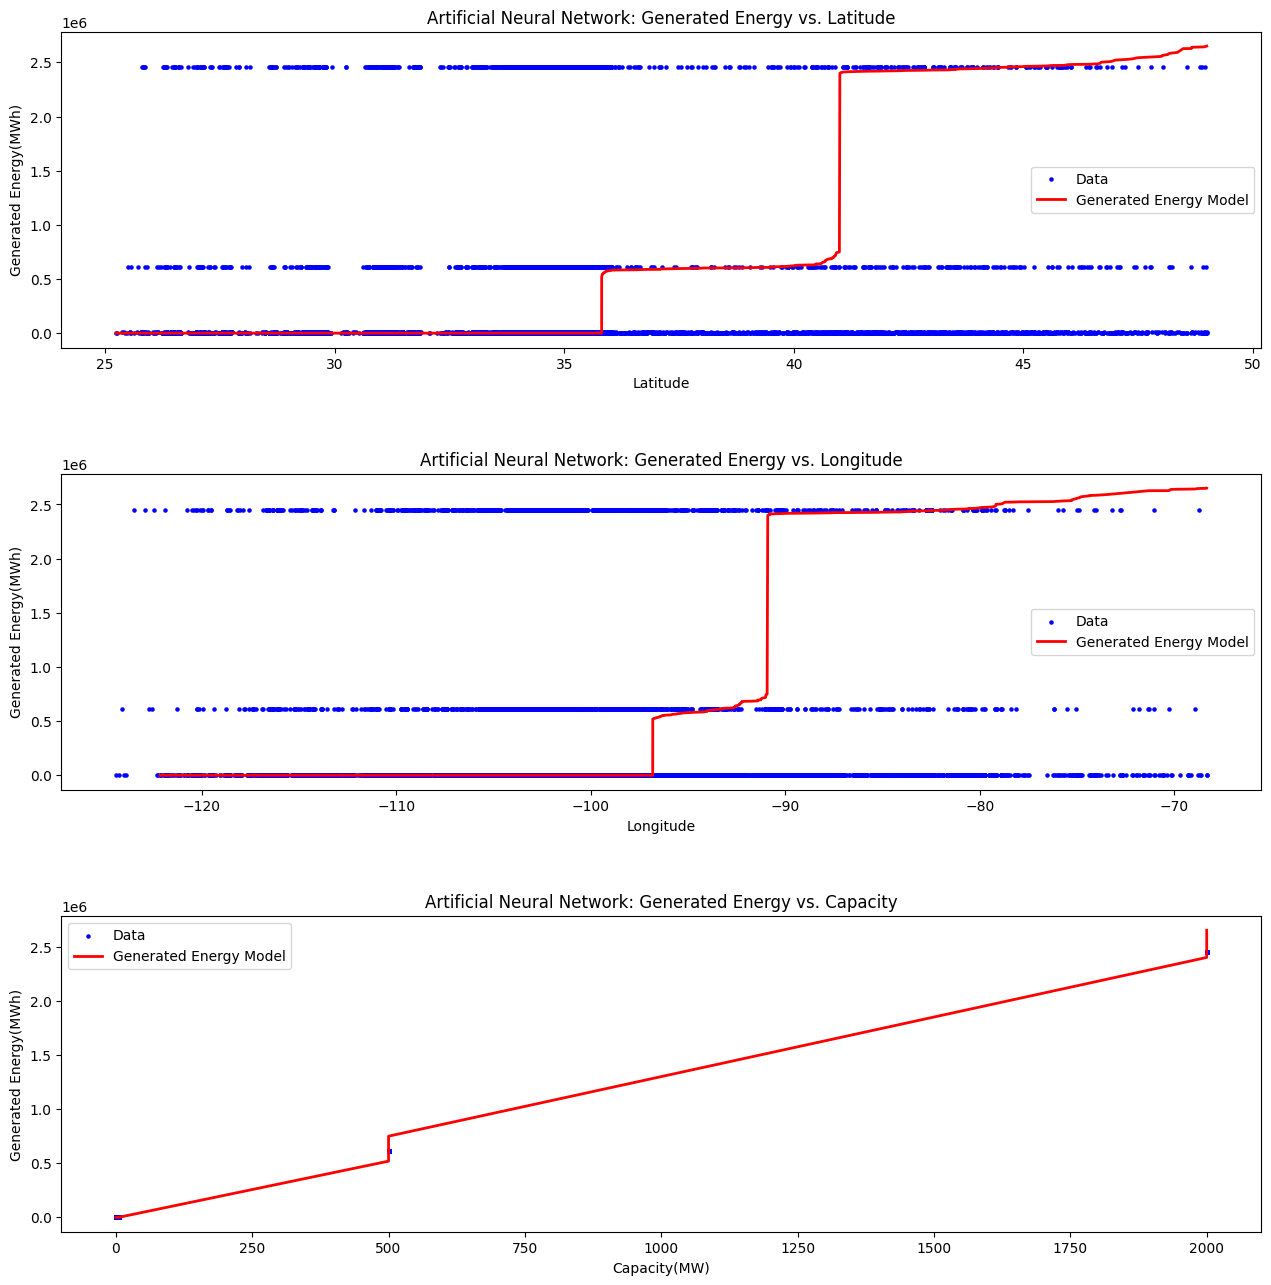

In [22]:
#| label: fig-generated-energy-vs-input-features

plot_lat_x = X[9500:].loc[:,['lat']].sort_values(by=['lat'])
plot_long_x = X[9500:].loc[:,['long']].sort_values(by=['long'])
plot_cap_x = X[9500:].loc[:,['capacity']].sort_values(by=['capacity'])
plot_energy_y = pd.DataFrame(preds).loc[:,[0]].sort_values(by=[0])

figure, axis = plt.subplots(3)

figure.set_size_inches(15,15)

axis[0].scatter(X.loc[:,["lat"]], y.loc[:,['generated_energy']], color='blue', label='Data', s=5)
axis[0].plot(plot_lat_x, plot_energy_y, color='red',lw=2, label="Generated Energy Model")
axis[0].set_xlabel("Latitude")
axis[0].set_ylabel("Generated Energy(MWh)")
axis[0].set_title("Artificial Neural Network: Generated Energy vs. Latitude")
axis[0].legend()

axis[1].scatter(X.loc[:,["long"]], y.loc[:,['generated_energy']], color='blue', label='Data', s=5)
axis[1].plot(plot_long_x, plot_energy_y, color='red',lw=2, label="Generated Energy Model")
axis[1].set_xlabel("Longitude")
axis[1].set_ylabel("Generated Energy(MWh)")
axis[1].set_title("Artificial Neural Network: Generated Energy vs. Longitude")
axis[1].legend()

axis[2].scatter(X.loc[:,["capacity"]], y.loc[:,['generated_energy']], color='blue', label='Data', s=5)
axis[2].plot(plot_cap_x, plot_energy_y, color='red',lw=2, label="Generated Energy Model")
axis[2].set_xlabel("Capacity(MW)")
axis[2].set_ylabel("Generated Energy(MWh)")
axis[2].set_title("Artificial Neural Network: Generated Energy vs. Capacity")
axis[2].legend()

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=.4, 
                    hspace=.4)

plt.show()

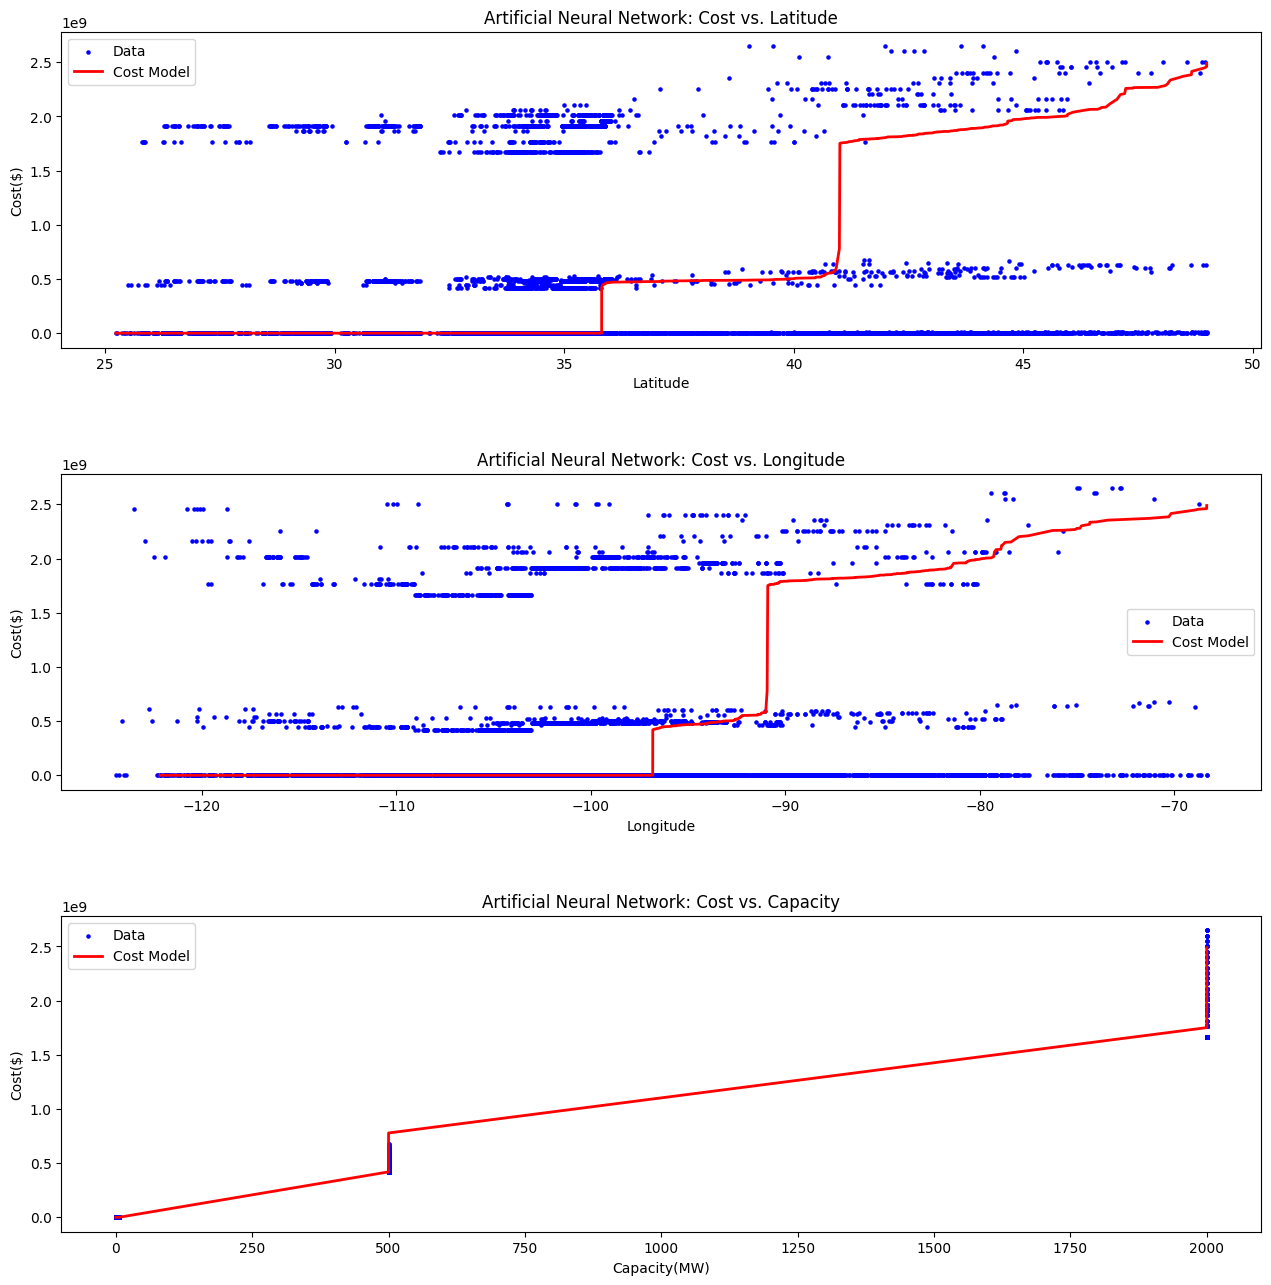

In [23]:
#| label: fig-cost-vs-input-features

plot_cost_y = pd.DataFrame(preds).loc[:,[1]].sort_values(by=[1])

figure, axis = plt.subplots(3)

figure.set_size_inches(15,15)

axis[0].scatter(X.loc[:,["lat"]], y.loc[:,['cost']], color='blue', label='Data', s=5)
axis[0].plot(plot_lat_x, plot_cost_y, color='red',lw=2, label="Cost Model")
axis[0].set_xlabel("Latitude")
axis[0].set_ylabel("Cost($)")
axis[0].set_title("Artificial Neural Network: Cost vs. Latitude")
axis[0].legend()

axis[1].scatter(X.loc[:,["long"]], y.loc[:,['cost']], color='blue', label='Data', s=5)
axis[1].plot(plot_long_x, plot_cost_y, color='red',lw=2, label="Cost Model")
axis[1].set_xlabel("Longitude")
axis[1].set_ylabel("Cost($)")
axis[1].set_title("Artificial Neural Network: Cost vs. Longitude")
axis[1].legend()

axis[2].scatter(X.loc[:,["capacity"]], y.loc[:,['cost']], color='blue', label='Data', s=5)
axis[2].plot(plot_cap_x, plot_cost_y, color='red',lw=2, label="Cost Model")
axis[2].set_xlabel("Capacity(MW)")
axis[2].set_ylabel("Cost($)")
axis[2].set_title("Artificial Neural Network: Cost vs. Capacity")
axis[2].legend()

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=.4, 
                    hspace=.4)

plt.show()

A Graph that models the structure of a nueral network as a visual aid.

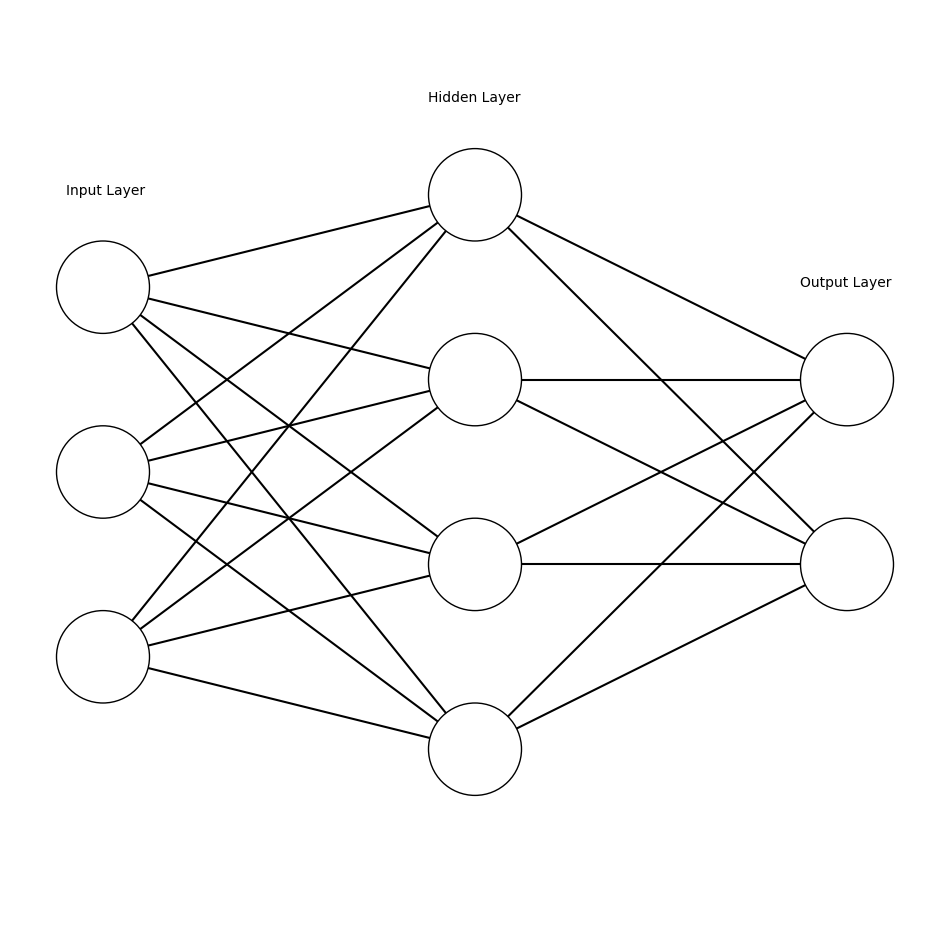

In [3]:
# Code originally comes from @craffel on GitHub: https://gist.github.com/craffel/2d727968c3aaebd10359
# Updates were made to make it compatible with Python 3
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [3, 4, 2])

plt.text(.06, .80, "Input Layer")
plt.text(.45, .90, "Hidden Layer")
plt.text(.85, .70, "Output Layer")

plt.show()